In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
df_raw = pd.read_csv('raw_data/weather_臺北_466920.csv')
df_raw.head()

,Date,station_ID,station_name,hour,air_presr,pressure,temp_℃,露點溫度℃,humidity,wind_spd_m_s,wind_dir360degree,gust_wind_m_s,gust_wind_dir_360degree,precipitation＿mm_t,降水時數hr,日照時數hr,全天空日射量,能見度km_t,紫外線指數,總雲量0_10
0,2020-01-01,466920,臺北,1,1024.9,1028.6,14.8,11.7,82,3.6,110,7.5,100,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2020-01-01,466920,臺北,2,1024.3,1028.0,14.8,12.3,85,3.3,110,8.4,90,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2020-01-01,466920,臺北,3,1024.0,1027.7,14.7,12.9,89,3.1,100,7.5,90,0.0,0.0,0.0,0.0,0.0,0,0.0
3,2020-01-01,466920,臺北,4,1023.8,1027.5,14.5,13.0,91,4.3,90,8.9,90,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2020-01-01,466920,臺北,5,1024.1,1027.8,14.7,13.0,90,2.8,100,8.3,90,0.0,0.0,0.0,0.0,0.0,0,0.0


In [24]:
columns = ['Date','station_ID','station_name','hour','air_presr',
           'temp_℃','humidity','wind_spd_m_s','wind_dir360degree','precipitation＿mm_t']

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv('raw_data/weather_臺北_466920.csv',
                 usecols=columns,
                 parse_dates={'date': ['Date']}, 
                 date_parser=dateparse)
df['datetime'] = df['date'] + df['hour'].astype('timedelta64[h]')
df['weekday'] = df['date'].dt.weekday
df.head()

,date,station_ID,station_name,hour,air_presr,temp_℃,humidity,wind_spd_m_s,wind_dir360degree,precipitation＿mm_t,datetime,weekday
0,2020-01-01,466920,臺北,1,1024.9,14.8,82,3.6,110,0.0,2020-01-01 01:00:00,2
1,2020-01-01,466920,臺北,2,1024.3,14.8,85,3.3,110,0.0,2020-01-01 02:00:00,2
2,2020-01-01,466920,臺北,3,1024.0,14.7,89,3.1,100,0.0,2020-01-01 03:00:00,2
3,2020-01-01,466920,臺北,4,1023.8,14.5,91,4.3,90,0.0,2020-01-01 04:00:00,2
4,2020-01-01,466920,臺北,5,1024.1,14.7,90,2.8,100,0.0,2020-01-01 05:00:00,2


## 1. Weather Data Explore

In [4]:
def draw_weather_plot(preci_axis, month_range, source_df, subplot_title):
    df_plot1 = source_df[(source_df['datetime'].dt.month >= month_range[0] ) & 
                         (source_df['datetime'].dt.month <= month_range[1] ) & 
                         (source_df['datetime'].dt.year == 2020)]

    preci_axis.bar( df_plot1.groupby(['date'],as_index=False)['precipitation＿mm_t'].sum()['date'],
                    df_plot1.groupby(['date'],as_index=False)['precipitation＿mm_t'].sum()['precipitation＿mm_t'],
                    alpha=0.35 )
    preci_axis.set_ylim(0, 150)
    preci_axis.set_ylabel('mm/day', fontsize=14)
    preci_axis.set_title(subplot_title, fontsize=18, y=1.025)

    temp_axis = preci_axis.twinx()
    temp_axis.plot(df_plot1['datetime'], df_plot1['temp_℃'], color='maroon', linewidth=1)
    temp_axis.set_ylim(0, 40)
    temp_axis.set_ylabel('temparature(℃)', fontsize=14)

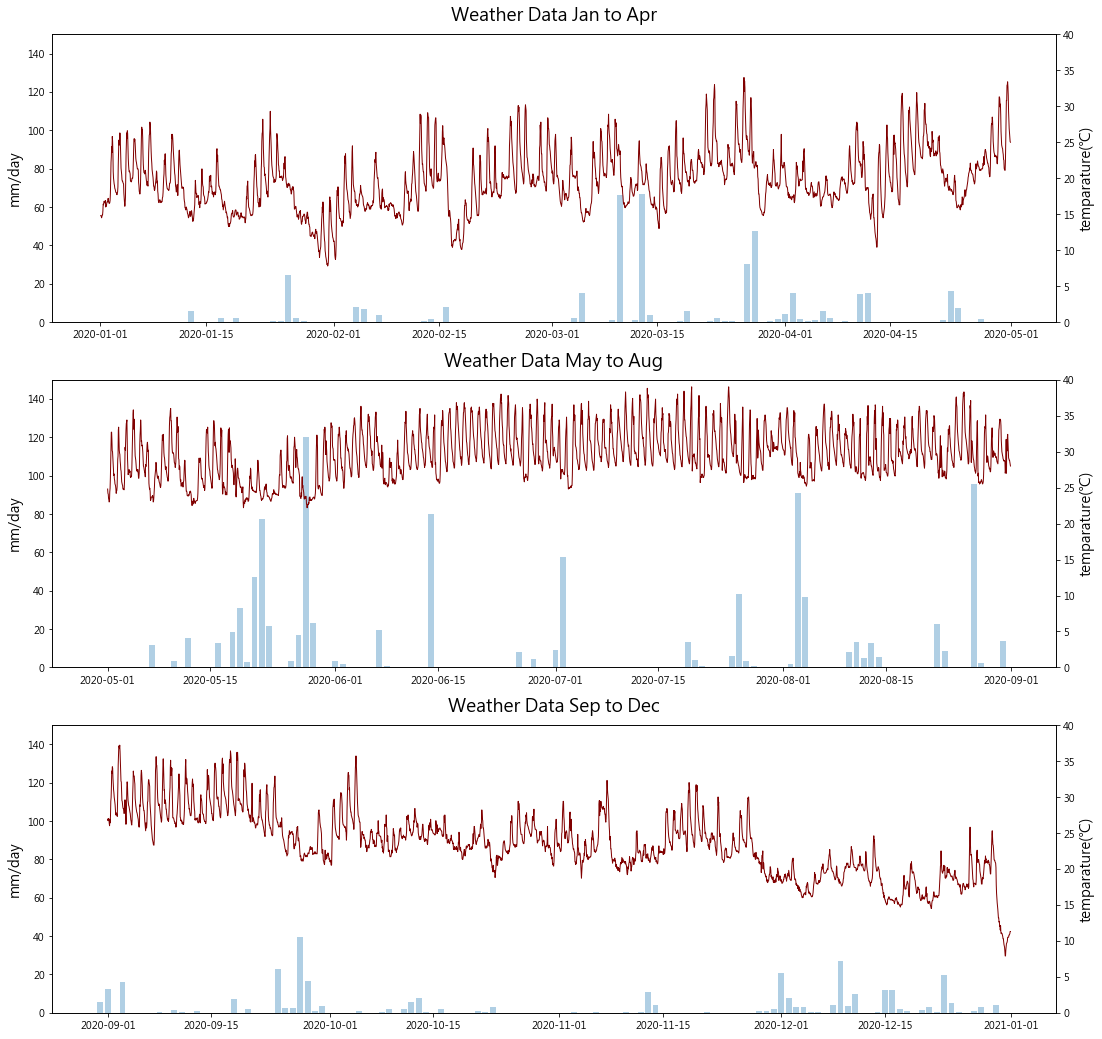

In [5]:
fig, (ax1,ax3,ax5) = plt.subplots(3,1, figsize=(18, 18))

draw_weather_plot(preci_axis=ax1,
                  month_range=[1,4],
                  source_df=df,
                  subplot_title='Weather Data Jan to Apr')

draw_weather_plot(preci_axis=ax3,
                  month_range=[5,8],
                  source_df=df,
                  subplot_title='Weather Data May to Aug')

draw_weather_plot(preci_axis=ax5,
                  month_range=[9,12],
                  source_df=df,
                  subplot_title='Weather Data Sep to Dec')

In [6]:
df[['air_presr','temp_℃','humidity','wind_spd_m_s','precipitation＿mm_t']].describe()

,air_presr,temp_℃,humidity,wind_spd_m_s,precipitation＿mm_t
count,8784.000000,8784.00000,8784.000000,8784.000000,8784.000000
mean,1010.346186,24.22566,74.347791,2.353848,0.193852
std,16.458843,5.78695,16.665602,1.407009,1.331566
min,0.000000,7.80000,24.000000,0.000000,0.000000
25%,1005.300000,19.70000,64.000000,1.200000,0.000000
50%,1010.600000,24.20000,77.000000,2.100000,0.000000
75%,1015.600000,28.60000,87.000000,3.400000,0.000000
max,1027.300000,39.00000,100.000000,8.700000,40.000000


## 2. Weather Data Preporcess

In [21]:
def read_weather_data(path):
    columns = ['Date','station_ID','hour','air_presr',
               'temp_℃','humidity','wind_spd_m_s','precipitation＿mm_t']

    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

    df = pd.read_csv(path,
                     usecols=columns,
                     parse_dates={'date': ['Date']}, 
                     date_parser=dateparse)
    df['datetime'] = df['date'] + df['hour'].astype('timedelta64[h]')
    df['weekday'] = df['date'].dt.weekday
    
    return df


def drop_holidays(input_df):
    holidays = ['01-01','01-23','01-24','01-27','01-28',
              '01-29','02-28','04-02','04-03','05-01',
              '06-25','06-26','10-01','10-02','10-09']
    holidays = '|'.join(holidays)

    df_out = input_df[ ~( (input_df['date'].astype(str).str.contains(holidays)) | (input_df['weekday'].isin([5,6])) ) ]
    df_out = df_out[['datetime','air_presr', 
                             'temp_℃','humidity', 'wind_spd_m_s', 'precipitation＿mm_t']]
    df_out.set_index(['datetime'], inplace=True)
    
    return df_out

def scale_df(input_df):
 
    scaler = MinMaxScaler()

    # store them in this dataframe
    df_out = pd.DataFrame(scaler.fit_transform\
                             (input_df[['air_presr', 'temp_℃','humidity', 'wind_spd_m_s', 'precipitation＿mm_t']]\
                              .astype(float)))

    # get same features and State-County indices
    df_out.columns=df_workday.columns
    df_out.index=df_workday.index
    
    return df_out

In [32]:
file_name = '臺北_466920'
df = read_weather_data('raw_data/weather_{}.csv'.format(file_name))
#df_workday = drop_holidays(df)
#df.set_index(['date'], inplace=True)
df = df[['datetime','air_presr','temp_℃','humidity','wind_spd_m_s','precipitation＿mm_t']]
df.to_csv('../data/weather_tmc_all.csv', index=False)


file_name = '信義_C0AC70'
df = read_weather_data('raw_data/weather_{}.csv'.format(file_name))
#df_workday = drop_holidays(df)
#df.set_index(['date'], inplace=True)
df = df[['datetime','air_presr','temp_℃','humidity','wind_spd_m_s','precipitation＿mm_t']]
df.to_csv('../data/weather_tch_all.csv', index=False)